In [380]:
# Initial imports
import plotly as py
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px
import hvplot.pandas
py.offline.init_notebook_mode(connected = True)

# Import PCA from sci-kit learn
from sklearn.decomposition import PCA
import hvplot.pandas

In [381]:
file_path = "Resources/crypto_data.csv"
crypto_df = pd.read_csv(file_path)
crypto_df.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
crypto_df.head()

,Index,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [382]:
crypto_df = crypto_df.set_index('Index')

In [383]:
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [384]:
print (crypto_df[pd.to_numeric(crypto_df['TotalCoinSupply'], errors='coerce').isnull()])

      CoinName Algorithm  IsTrading ProofType  TotalCoinsMined TotalCoinSupply
Index                                                                         
KRAK    Kraken   SHA-256       True   PoW/PoS              NaN      20 000 000
NBIT    NetBit    Scrypt       True   PoW/PoS              NaN      10.500.000
MLITE   MeLite  SHA-256D       True   PoW/PoS              NaN       1.000.000


In [385]:
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].str.replace(" ","")

In [386]:
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].str.replace(".","")

In [387]:
crypto_df[['TotalCoinSupply']] = crypto_df[['TotalCoinSupply']].apply(pd.to_numeric)

In [388]:
# Remove all cryptocurrencies that aren’t trading.
crypto_df[crypto_df['IsTrading']==True].shape

(1144, 6)

In [389]:
crypto_df = crypto_df[crypto_df['IsTrading']==True]

In [390]:
#Remove all cryptocurrencies that don’t have an algorithm defined
crypto_df[crypto_df.Algorithm.isnull()]

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Index,,,,,,


In [391]:
# Remove the IsTrading column.
crypto_df = crypto_df.drop('IsTrading', 1)

In [392]:
# Remove all cryptocurrencies with at least one null value.
crypto_df_clean = crypto_df.dropna()

In [393]:
crypto_df_clean.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Index,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [394]:
# Remove all cryptocurrencies without coins mined.
cond = crypto_df_clean['TotalCoinsMined'] > 0
crypto_df_clean = crypto_df_clean[cond]

# TotalCoinSupply has many outliers, so it is log transformed.
# Removing all cryptocurrencies without coins supplied.
cond = crypto_df_clean['TotalCoinSupply'] > 0
crypto_df_clean = crypto_df_clean[cond]

crypto_df_clean['TotalCoinSupply_log'] = np.log2(crypto_df_clean['TotalCoinSupply'])
crypto_df_clean = crypto_df_clean.drop('TotalCoinSupply', 1)
crypto_df_clean['TotalCoinsMined_log'] = np.log2(crypto_df_clean['TotalCoinsMined'])
crypto_df_clean = crypto_df_clean.drop('TotalCoinsMined', 1)
crypto_df_clean.head()

,CoinName,Algorithm,ProofType,TotalCoinSupply_log,TotalCoinsMined_log
Index,,,,,
42,42 Coin,Scrypt,PoW/PoS,5.392317,5.392316
404,404Coin,Scrypt,PoW/PoS,28.986851,29.974849
1337,EliteCoin,X13,PoW/PoS,38.192705,34.769168
BTC,Bitcoin,SHA-256,PoW,24.323886,24.095645
LTC,Litecoin,Scrypt,PoW,26.323886,25.909747


In [320]:
# Outlier detected when doing 3d scatter plot. Deleting outlier row with index label 'b' 
# crypto_df_clean = crypto_df_clean.drop(['BTT' , 'VET'])

In [395]:
coins_name = crypto_df_clean['CoinName']
coins_name.head()
# Remove the CoinName column.
crypto_df_clean = crypto_df_clean.drop('CoinName', 1)

In [396]:
# Binary encoding using Pandas (multiple columns)
X = pd.get_dummies(crypto_df_clean, columns=["Algorithm","ProofType"])

In [397]:
X.head()

,TotalCoinSupply_log,TotalCoinsMined_log,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Index,,,,,,,,,,,,,,,,,,,,,
42,5.392317,5.392316,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,28.986851,29.974849,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,38.192705,34.769168,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,24.323886,24.095645,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,26.323886,25.909747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [398]:
# Creating the scaler instance
data_scaler = StandardScaler()
# Fitting the scaler
data_scaler.fit(X)
# Transforming the data
X_scaled = data_scaler.transform(X)


In [399]:
X_df_scaled = pd.DataFrame(X_scaled)

In [400]:
X_df_scaled.index = X.index

In [401]:
X_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
Index,,,,,,,,,,,,,,,,,,,,,
42,-4.987300,-4.691314,-0.044901,-0.044901,-0.063564,-0.077929,-0.044901,-0.044901,-0.063564,-0.044901,...,1.438020,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901
404,0.381590,1.081920,-0.044901,-0.044901,-0.063564,-0.077929,-0.044901,-0.044901,-0.063564,-0.044901,...,1.438020,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901
1337,2.476364,2.207871,-0.044901,-0.044901,-0.063564,-0.077929,-0.044901,-0.044901,-0.063564,-0.044901,...,1.438020,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901
BTC,-0.679458,-0.298818,-0.044901,-0.044901,-0.063564,-0.077929,-0.044901,-0.044901,-0.063564,-0.044901,...,-0.695401,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901
LTC,-0.224362,0.127226,-0.044901,-0.044901,-0.063564,-0.077929,-0.044901,-0.044901,-0.063564,-0.044901,...,-0.695401,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901,-0.044901


In [402]:
# Reduce the number of components in X to 3 using PCA
pca = PCA(n_components=3)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

X_pca = pca.transform(X_scaled)

[0.02408029 0.02220473 0.0211228 ]


In [403]:
pcs_df = pd.DataFrame(X_pca)
pcs_df.rename(columns={0:'PC1',1:'PC2',2:'PC3'}, inplace=True)
pcs_df.index = X.index
pcs_df.head()

,PC1,PC2,PC3
Index,,,
42,-4.891621,1.028323,-0.286224
404,0.263380,0.950531,-0.387081
1337,1.660346,1.739557,-0.478061
BTC,-0.407915,-1.239397,0.150701
LTC,-0.004093,-1.154705,0.017206


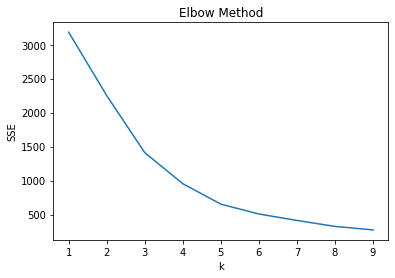

In [404]:
#Clustering Cryptocurrencies Using K-means
from matplotlib import pyplot as plt

sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [405]:
# Create a KMeans model with 5 clusters
model = KMeans(n_clusters=5, random_state=42).fit(pcs_df)

In [406]:
# Calculate predicted values.
y_pred = model.predict(pcs_df)

In [407]:
# Add predicted values to df_pca and replot the scatter plot of the PCA components, coloring by predicted cluster
pcs_df["class"] = y_pred

In [408]:
crypto_df_clean.shape
pcs_df.shape
clustered_df = pd.concat([crypto_df_clean, pcs_df.drop('class', 1), coins_name], axis=1)

In [409]:
clustered_df["Class"] = y_pred
clustered_df.head()

,Algorithm,ProofType,TotalCoinSupply_log,TotalCoinsMined_log,PC1,PC2,PC3,CoinName,Class
Index,,,,,,,,,
42,Scrypt,PoW/PoS,5.392317,5.392316,-4.891621,1.028323,-0.286224,42 Coin,1
404,Scrypt,PoW/PoS,28.986851,29.974849,0.263380,0.950531,-0.387081,404Coin,1
1337,X13,PoW/PoS,38.192705,34.769168,1.660346,1.739557,-0.478061,EliteCoin,4
BTC,SHA-256,PoW,24.323886,24.095645,-0.407915,-1.239397,0.150701,Bitcoin,0
LTC,Scrypt,PoW,26.323886,25.909747,-0.004093,-1.154705,0.017206,Litecoin,0


In [410]:
# Visualizing Results
fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [411]:
#crypto_df_clean[crypto_df_clean['Algorithm'] == "Scrypt"]

,Algorithm,ProofType,TotalCoinSupply_log,TotalCoinsMined_log
Index,,,,
42,Scrypt,PoW/PoS,5.392317,5.392316
404,Scrypt,PoW/PoS,28.986851,29.974849
LTC,Scrypt,PoW,26.323886,25.909747
PRC,Scrypt,PoW,24.323886,22.459717
ARG,Scrypt,PoW,25.931569,23.541063
...,...,...,...,...
PAK,Scrypt,PoW,27.439363,26.054334
XHI,Scrypt,PoS,33.220555,33.219316
XWC,Scrypt,PoW/PoS,28.160387,27.908880


In [412]:
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply_log', 'TotalCoinsMined_log','Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply_log,TotalCoinsMined_log,Class]

In [414]:
clustered_df.hvplot.scatter(
    x="TotalCoinsMined_log",
    y="TotalCoinSupply_log",
    hover_cols=["CoinName"],
    by="Class",
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined_log]   (TotalCoinSupply_log,CoinName)